# Gaussowska paczka falowa w kwantantowym oscylatorze harmonicznym

In [2]:
import matplotlib
from scipy.integrate import simps
import matplotlib.pyplot as plt
# sp.init_printing()
import numpy as np
import sympy as sp
from scipy.integrate import quad
import matplotlib.animation as animation
from IPython.display import HTML
from numpy.polynomial.hermite import hermval
from scipy.special import factorial
from scipy.special import hermite
import scipy.special as spec
import warnings
warnings.filterwarnings('ignore')
from numpy.polynomial.hermite import Hermite

In [3]:
def psi(x, n):
    f = 1/(np.sqrt(2**n * factorial(n) * np.sqrt(np.pi))) * np.exp(-x**2/2) * np.polyval(hermite(n), x)
    return f

In [4]:
szer = 1
x0 = 1
k = 2

def f(x, x0 = x0, a = szer, k = k ):
    return (1/np.sqrt(a * np.sqrt(np.pi))) * (np.exp((-(x - x0) ** 2) / ( 2 * a ** 2)) * np.exp(1j * k * x))

In [5]:
def phi(x, n):
    return psi(x, n)*f(x)

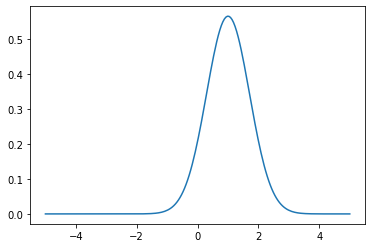

In [9]:
xs = np.linspace(-5, 5, 200)
plt.plot(xs, np.abs(f(xs)**2))

In [10]:
def C(n):
    val = quad(phi, -np.infty, np.infty, args = (n))
    return val[0]

In [11]:
def PsiSum(x, t, cn):
    ys = np.zeros_like(x, dtype = np.complex128)
    for n in cn.values():
        ys += C(n+1) * psi(x, n) * np.exp(1j * (n + 1/2) * t)
    return ys

In [12]:
N = 15
n = np.linspace(0, N, N+1)
m = { i : i for i in n }

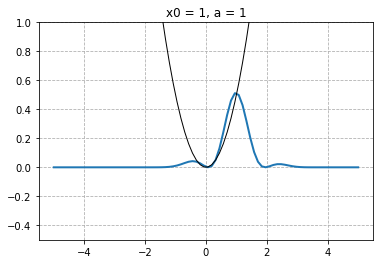

In [13]:
x00 = 5
xs = np.linspace(-x00, x00, 80)
fig2 = plt.figure()


ax = plt.axes(ylim = (-0.5, 1))
ax.set_title(f'x0 = {x0}, a = {szer}')

ax.grid(ls = '--')
t =0

line2, = ax.plot(xs, np.abs(PsiSum(xs, t, m))**2, lw = 2)
line5, = ax.plot(xs, 1/2*xs**2, lw = 1, c = 'k')

In [14]:
xs = np.linspace(-4, 4, 100)
fig = plt.figure()
ax = plt.axes(xlim = (-4, 4), ylim = (-0.1, 0.8))
ax.grid(ls = '--')
ax.set_title(f'x0 = {x0}, a = {szer}')
line1, = ax.plot([], [], lw = 2)
line2, = ax.plot([], [], lw = 2)
line3, = ax.plot([], [], lw = 2)
line4, = ax.plot(xs, 1/2*xs**2, lw = 1, c = 'k')
dt = 0.03
plt.close()


def animate(i):
    line1.set_data(xs, np.abs(PsiSum(xs, dt * i, m))**2)
#     line2.set_data(xs, np.imag(PsiSum(xs, dt * i, m)))
#     line3.set_data(xs, np.real(PsiSum(xs, dt * i, m)))
    return line1, #line2, line3

anim = animation.FuncAnimation(fig, animate, frames=300, interval=20, blit=True)
HTML(anim.to_html5_video())